In [1]:
import TdCARS
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])

c:\Users\dinus\OneDrive\Documents\Projects\Python\Python Physics\Optics\td_CARS_fit\TdCARS.py:209: SyntaxWarning: invalid escape sequence '\,'
  plt.xlabel("$wavenumber$ [1/cm]"); plt.ylabel("$t_d\, [fs]$"); plt.grid(); plt.show()
c:\Users\dinus\OneDrive\Documents\Projects\Python\Python Physics\Optics\td_CARS_fit\TdCARS.py:295: SyntaxWarning: invalid escape sequence '\,'
  plt.title(f"$CARS\,\, signal\,\,vs\,\, dellay\,\, @\,\, wavenumber\,\, =\,\, {self.wn_as[self.wn_as>=wn_target][-1]:.0f}\,$"+r"$cm^{-1}$"+"$\, for\,\, {self.sample}$")
c:\Users\dinus\OneDrive\Documents\Projects\Python\Python Physics\Optics\td_CARS_fit\TdCARS.py:295: SyntaxWarning: invalid escape sequence '\,'
  plt.title(f"$CARS\,\, signal\,\,vs\,\, dellay\,\, @\,\, wavenumber\,\, =\,\, {self.wn_as[self.wn_as>=wn_target][-1]:.0f}\,$"+r"$cm^{-1}$"+"$\, for\,\, {self.sample}$")
c:\Users\dinus\OneDrive\Documents\Projects\Python\Python Physics\Optics\td_CARS_fit\TdCARS.py:295: SyntaxWarning: invalid escape sequence '\,'


In [2]:
cars_file_path = r"D:\Academic\URI\Research\Data_and_Results\experimental_data\2024\CARS\Aug_07\LNB_1.dat"
CARS = TdCARS.TdCARS(cars_file_path)
CARS.notes_df

,0,1
0,DET,Syncerity CCD
1,SMP,LNB
2,P3 (TiS),140
3,P1 (OPO1),200
4,P2 (OPO2),220
5,Polarizations,All parallel
6,Ti-Sa,815.8
7,OPO1,1016.8
8,OPO2,1114.2
9,MONO,757


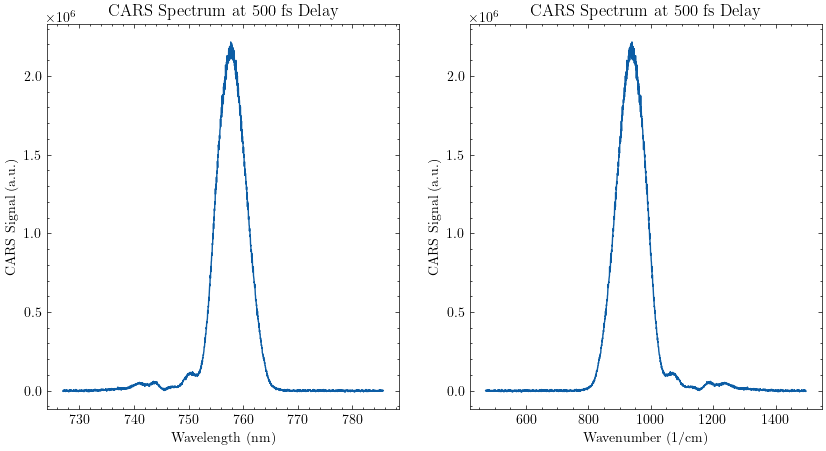

In [3]:
td = 500  # Time delay in fs
res = CARS.plot_spectra_at_td(td, show_plot=True)

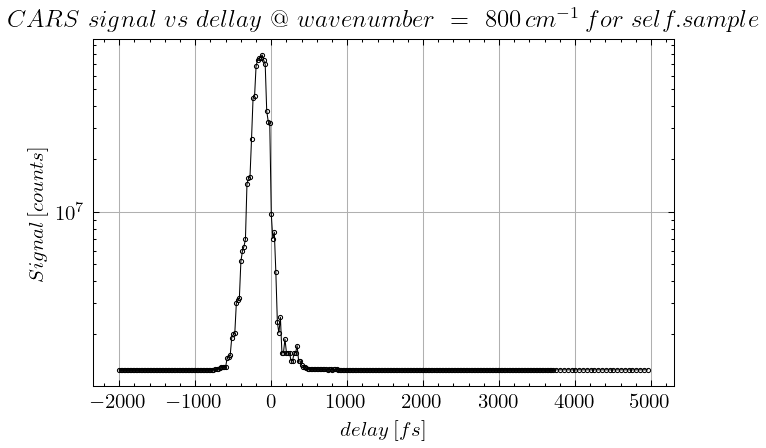

In [4]:
wn_target = 800  # Wavenumber in cm^-1
res = CARS.get_transient_at_wn(wn_target,showPlot=True)

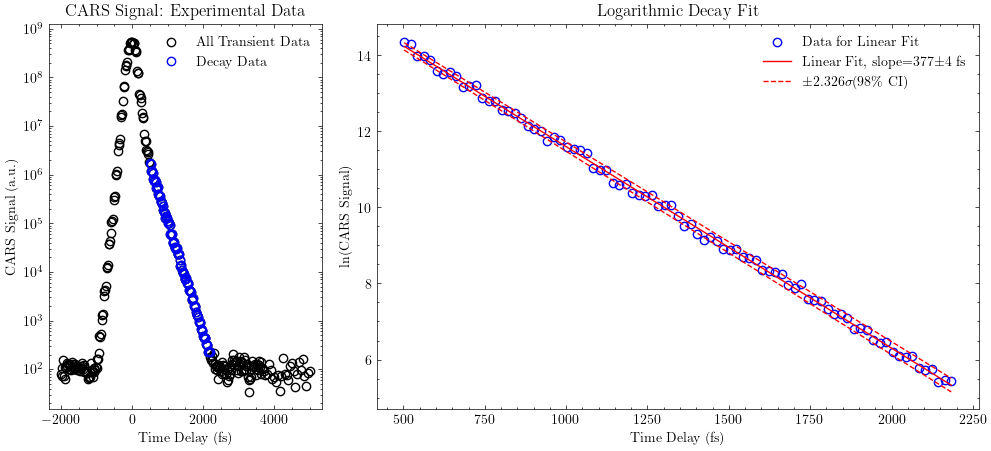

In [5]:
corrections = np.array([[120,100], [650,500], [30,30]])
CARS.correct_experimental_data(corrections)
td1,td2 = 500,2200 #Time delay range for fitting [fs]
T2, dT2 = CARS.get_T2(td1, td2, show_plot=True)

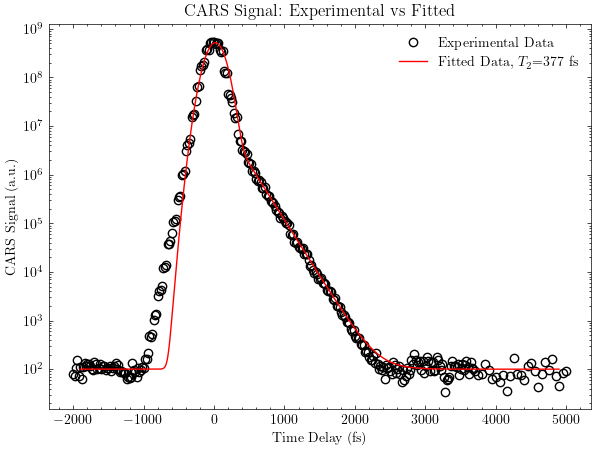

In [6]:
CARS.tp1,CARS.tp2,CARS.tp3 = 260,260,220  # Pulse durations [fs]
CARS.tmin,CARS.tmax = -3000,6000  # Time delay range [fs]
CARS.floor = 100  # Baseline signal level
CARS.nuR1 = np.array([730,10])  # Raman shift frequencies [cm^-1]
CARS.T21 = np.array([T2,10])  # Dephasing times [fs]
CARS.A1 = np.array([1.9e25,0])  # Amplitudes of Raman modes [au]
CARS.phi1 = 0  # Phase of first Raman mode [rad]

td_fit, signal_fit = CARS.CARS_simulation_FG(showPlot=True)

c:\Users\dinus\OneDrive\Documents\Projects\Python\Python Physics\Optics\td_CARS_fit\TdCARS.py:196: RuntimeWarning: divide by zero encountered in log
  Z = np.log(spectra_sc_crop)


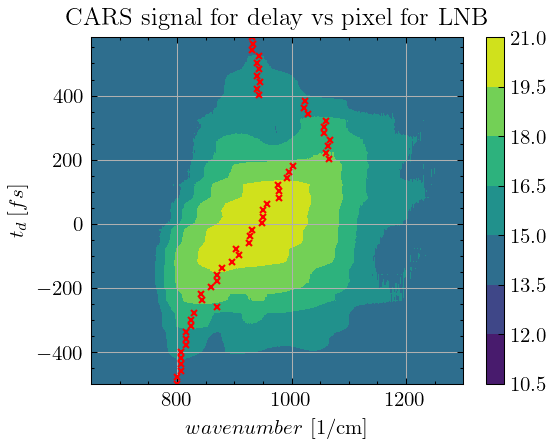

In [7]:
Z = CARS.get_spectra_contour(show_plot=True, wn_lim=[650,1300], td_lim=[-500,600])